In [0]:
pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,Embedding
from tensorflow.keras.datasets import reuters
#from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
x_train.shape,x_test.shape

((8982,), (2246,))

In [0]:
print(x_train[2])

[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 1118, 7, 2, 81, 5, 187, 11, 15, 9, 1709, 201, 5, 47, 3615, 18, 478, 4514, 5, 1118, 7, 232, 2, 71, 5, 160, 63, 11, 9, 2, 81, 5, 102, 59, 11, 17, 12]


yo numbers lai word ma convert garna

In [0]:
word_index = reuters.get_word_index()


In [0]:
word_index.keys

<function dict.keys>

yo word_index euta dictionary ho ra yasako key,value lai reverse gareko

In [0]:
index_to_word = {}   # empty dictionary
for key,value in word_index.items():
  index_to_word[value] = key   # yasari revrese hunxa, empty dict ma assign garepaxi

In [0]:
index_to_word[50]

'shr'

aba sab numbers lai words ma convert garna

In [0]:
print(index_to_word[x] for x in x_train[1])  # x_train ko 2nd item ko numbers lai word banako with the help of index_to_word dictionary

<generator object <genexpr> at 0x7f37b8d7a8e0>


aba generator lai print garna yasalai list ma convert garne

In [0]:
print(list(index_to_word[x] for x in x_train[1]))

['the', 'termination', 'payment', 'airport', 'takes', '6', 'of', 'geological', '3', '6', '602', 'begin', 'up', 'said', 'fully', 'bank', 'expects', 'commodity', 'total', 'is', 'giant', 'a', 'of', 'this', 'takes', 'of', 'series', 'termination', 'payment', 'airport', 'mln', 'a', 'for', 'capital', '1', 'pre', '50', 'american', 'east', 'said', 'in', 'council', 'takes', 'of', 'of', 'france', 'a', 'but', 'u', 'any', '4', 's', '1st', 'losses', 'pct', 'dlrs']


list ma print vayo, aba yo list items lai join garera print garau

In [0]:
print(' '.join(index_to_word[x] for x in x_train[1]))  

the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs


### tokenize the words

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)


In [0]:
x_train = tokenizer.sequences_to_matrix(x_train, mode = 'binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode = 'binary')


In [0]:
num_classes = max(y_train)+1
num_classes

46

In [0]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)


to_categorical is used for one hot encoding

In [0]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_train.shape

(8982, 46)

In [0]:
y_test[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_test.shape

(2246, 46)

In [0]:
x_train.shape

(8982, 10000)

## building a model

In [0]:
model = Sequential()

model.add(Dense(64,activation= 'relu', input_shape = (10000,)))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train,batch_size=32,epochs= 10,validation_data=(x_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 326us/sample - loss: 0.4371 - accuracy: 0.8853 - val_loss: 0.9898 - val_accuracy: 0.8050
Epoch 2/10
8982/8982 [==============================] - 3s 318us/sample - loss: 0.3714 - accuracy: 0.9014 - val_loss: 1.0591 - val_accuracy: 0.8028
Epoch 3/10
8982/8982 [==============================] - 3s 309us/sample - loss: 0.3543 - accuracy: 0.9076 - val_loss: 1.0562 - val_accuracy: 0.8072
Epoch 4/10
8982/8982 [==============================] - 3s 315us/sample - loss: 0.3181 - accuracy: 0.9162 - val_loss: 1.1308 - val_accuracy: 0.8023
Epoch 5/10
8982/8982 [==============================] - 3s 317us/sample - loss: 0.2915 - accuracy: 0.9201 - val_loss: 1.1418 - val_accuracy: 0.7979
Epoch 6/10
8982/8982 [==============================] - 3s 319us/sample - loss: 0.2715 - accuracy: 0.9272 - val_loss: 1.1838 - val_accuracy: 0.8023
Epoch 7/10
8982/8982 [==============================] - 3s 318us

In [0]:
history.history

{'accuracy': [0.8853262,
  0.90135825,
  0.90759295,
  0.91616565,
  0.92006236,
  0.9271877,
  0.928969,
  0.928969,
  0.93431306,
  0.93687373],
 'loss': [0.437122406559515,
  0.37135913160483786,
  0.35425926489119697,
  0.3181263556381664,
  0.29153910250075543,
  0.271453380690893,
  0.2628047675362172,
  0.25181203856948114,
  0.23515969086160535,
  0.23172925180394516],
 'val_accuracy': [0.80498666,
  0.8027605,
  0.8072128,
  0.80231524,
  0.7978629,
  0.80231524,
  0.80632234,
  0.8058771,
  0.8032057,
  0.8054319],
 'val_loss': [0.9898403308695167,
  1.0591336799750664,
  1.0562381348435834,
  1.1307900273576976,
  1.141838259391241,
  1.1837807540265133,
  1.2028863675235535,
  1.2088098708583326,
  1.2951245622133847,
  1.3093412587500426]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,11)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

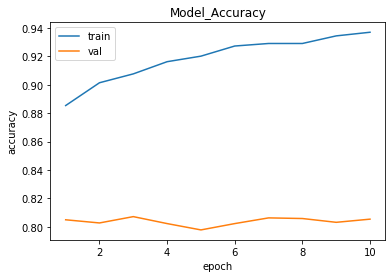

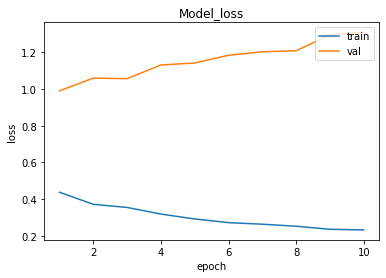

In [0]:
plot_curve(history)

jot ko result

In [0]:
y_test[4]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)